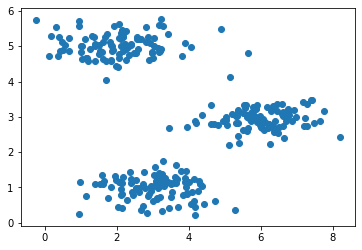

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score

info = pd.read_csv(r'C:\Users\ASUS\Desktop\python\k-means.csv', header = None, sep = '\t')

for id, row in info.iterrows():
    row[0]=float (row[0].replace(',','.'))
    row[1]=float (row[1].replace(',','.'))

X1 = info.iloc[:,[0]].values
X2 = info.iloc[:,[1]].values
data_n=info.values

plt.scatter(X1,X2)

In [78]:
K = 3 #centroids
m_iters = 10

In [79]:
#initializes centroids with random values
def initialize_cents(data, K):
    m = data.shape[0]
    n = data.shape[1]
    cents = np.zeros((K,n))
    
    for i in range(K):
        cents[i] = data[np.random.randint(0,m+1),:]
        
    return cents
# finds the nearesr centroids 
def nearest_cents(data, cents):

    idx = np.zeros([data.shape[0], 1])
    
    K = cents.shape[0] # num of centroids
    m = data.shape[0] 
    
    for i in range(m):
        c = -1 # index of closest centroid
        min_distance = np.inf # distance to nearest centroid(np.inf is positive infinity)

        for k in range(K):
            dis = np.sum((data[i,:] - cents[k,:]) ** 2)
            if dis < min_distance:#swapping to find the closest centroid
                min_distance = dis
                c = k
        
        idx[i] = c
    
    return idx

In [80]:
first_cents = initialize_cents(data_n, K)
idx = nearest_cents(data_n, first_cents)

In [81]:
print('Nearest centroids:')
print(idx[0:3])

Nearest centroids:
[[2.]
 [1.]
 [1.]]


In [82]:
#caluclates the new centroids 
def calc_cents(data, idx, K):

    m, n = data.shape 
    centroids = np.zeros([K, n])
   
    for k in range(K):
        C = np.sum(idx==k) 
        idxk = (idx==k).astype(int) 
        data_k = data * idxk 

        # the mean of a new centroid is calculated here
        mn = (1/C) * np.sum(data_k, axis=0)
        centroids[k] = mn

    return centroids

In [83]:
centroids = calc_cents(data_n, idx, K)

In [84]:
print(centroids)

[[2.73274487 1.03300861]
 [5.65587457 2.6864691 ]
 [1.8916712  5.02822013]]


In [85]:
def plt_k_means(data, idx, cents_history, terminated=False):
    
    cl1 = data_n[np.where(idx == 0)[0],:]
    cl2 = data_n[np.where(idx == 1)[0],:]
    cl3 = data_n[np.where(idx == 2)[0],:]

    fig, ax = plt.subplots(figsize=(5,5))
    
    ax.scatter(cl1[:,0], cl1[:,1], marker="o",facecolors="none",edgecolors="r", label='Cluster 1')
    ax.scatter(cl2[:,0], cl2[:,1], marker="o",facecolors="none",edgecolors="g", label='Cluster 2')
    ax.scatter(cl3[:,0], cl3[:,1], marker="o",facecolors="none",edgecolors="b", label='Cluster 3')
    ax.legend()
    plt.plot(cents_history[:, :, 0], cents_history[:, :, 1], 'x-', c='k')
    
    plt.show()

In [86]:
def k_means(data, init_cents, max_iters, plot_progress=False):

    m, n = data.shape
    K = init_cents.shape[0]
    centroids = init_cents
    idx = np.zeros([m, 1])

    cents_history = np.zeros([max_iters+1, centroids.shape[0], centroids.shape[1]])
    cents_history[0] = init_cents
    
    print('Before:')
    plt_k_means(data, idx, cents_history)
    #k means
    for i in range(max_iters):
        idx = nearest_cents(data, centroids)
        centroids = calc_cents(data, idx, K)
        cents_history[i+1] = centroids
    
        print('Iteration number: ', i+1)
        plt_k_means(data, idx,cents_history)
        
    return centroids, idx

Before:


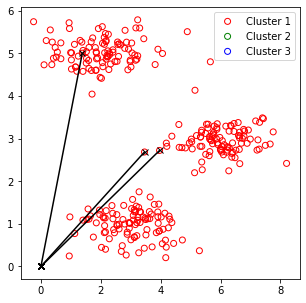

Iteration number:  1


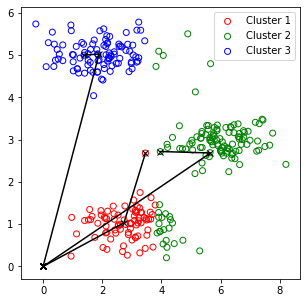

Iteration number:  2


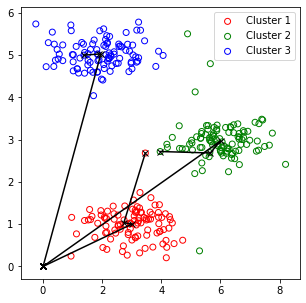

Iteration number:  3


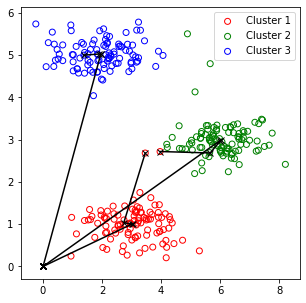

Iteration number:  4


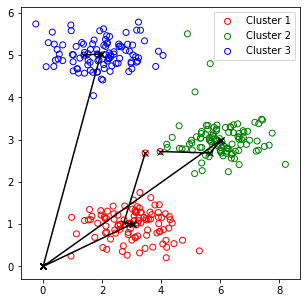

Iteration number:  5


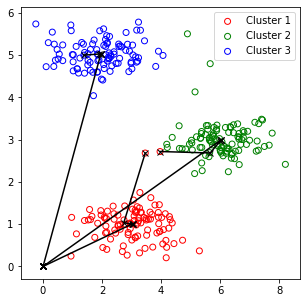

Iteration number:  6


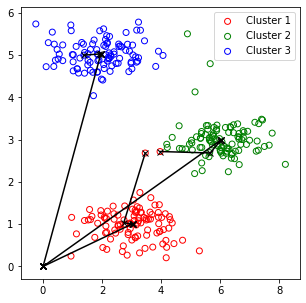

Iteration number:  7


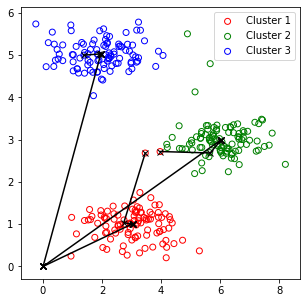

Iteration number:  8


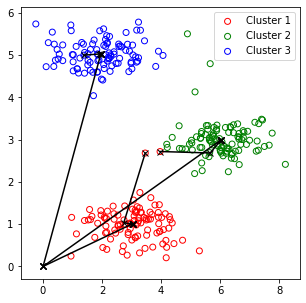

Iteration number:  9


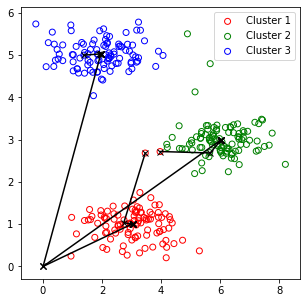

Iteration number:  10


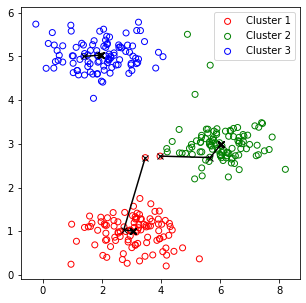

In [87]:
centroids, idx = k_means(data_n, first_cents, m_iters)

In [88]:
#to plot the graph that was in assignment instrcution pdf 
first_cents = np.array([[3,3],[6,2],[8,5]])
idx = nearest_cents(data_n, first_cents)

In [89]:
print('Nearest centroids:')
print(idx[0:3])

Nearest centroids:
[[0.]
 [2.]
 [1.]]


In [90]:
centroids = calc_cents(data_n, idx, K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


Before:


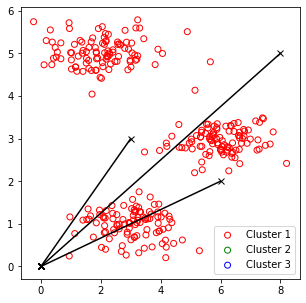

Iteration number:  1


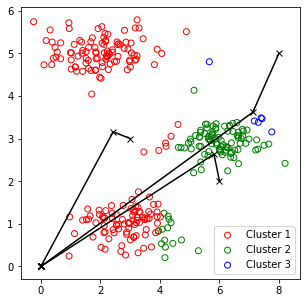

Iteration number:  2


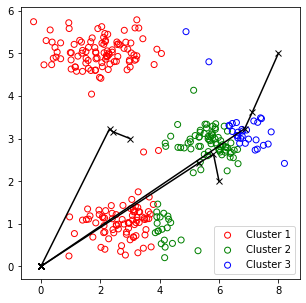

Iteration number:  3


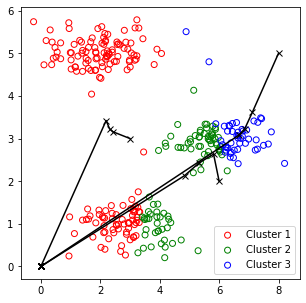

Iteration number:  4


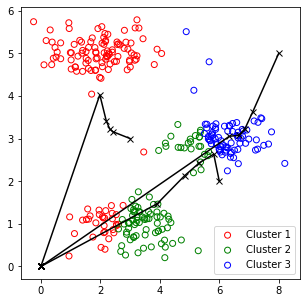

Iteration number:  5


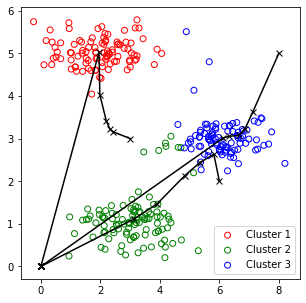

Iteration number:  6


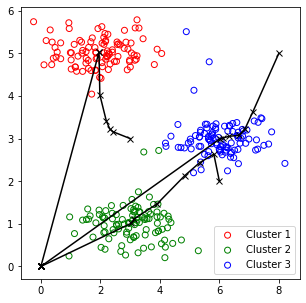

Iteration number:  7


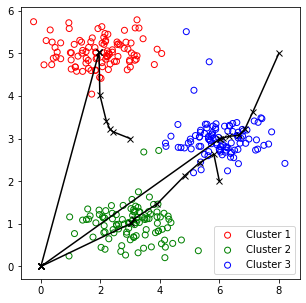

Iteration number:  8


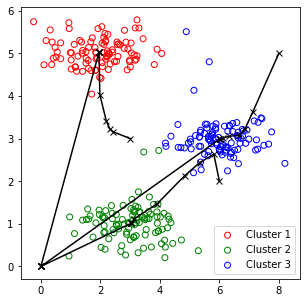

Iteration number:  9


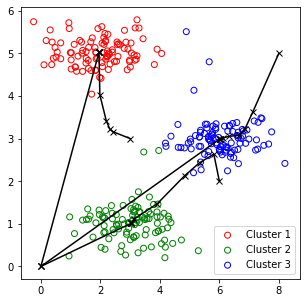

Iteration number:  10


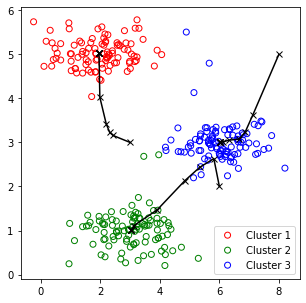

In [91]:
centroids, idx = k_means(data_n, first_cents, m_iters)

In [92]:
#calculating the cost
for k in range (1, K+1):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(data_n[:, :])
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)

k: 1  cost: 1957.654720625168
k: 2  cost: 913.3192714747092
k: 3  cost: 266.65851965491936


In [93]:
#Kmeans using scikit-learn library
kmean = KMeans(n_clusters=3)
y_kmean = kmean.fit_predict(data_n)
print(y_kmean)

kmean.cluster_centers_

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0]


array([[1.95399466, 5.02557006],
       [6.03366736, 3.00052511],
       [3.04367119, 1.01541041]])

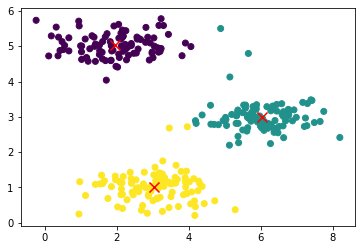

In [94]:
plt.scatter(data_n[:,0],data_n[:,1], c=y_kmean)
plt.scatter(
    kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1],
    s=100, marker='x',
    c='red', edgecolor='black',
    label='centroids'
)

In [95]:
#Silhouette score
rg = list (range(2,11))
print ("Clusters num: ", rg)

for n_clusters in rg:
    clr = KMeans (n_clusters=n_clusters).fit(data_n)
    preds = clr.predict(data_n)
    centers = clr.cluster_centers_

    score = silhouette_score (data_n, preds, metric='euclidean')
    print (n_clusters, score)
    


Clusters num:  [2, 3, 4, 5, 6, 7, 8, 9, 10]
2 0.547631974589349
3 0.6900993728779541
4 0.6057663995248568
5 0.5190595302854653
6 0.4498011057113261
7 0.4427529074824275
8 0.42802884604130803
9 0.41098427172644425
10 0.4141952779597649


In [96]:
kmean.predict([[0, 3], [5, 2]])

array([0, 1])

In [97]:
kmean.predict([[1, 1], [5, 2]])

array([2, 1])

In [98]:
kmean.predict([[5, 2], [2, 9]])

array([1, 0])

In [99]:
kmean.predict([[5, 3], [3, 3]])

array([1, 2])

In [75]:
kmean.predict([[6, 1], [2, 8]])

array([0, 1])